In [1]:
# pip install -U pyvisa  
# use above line if pyvisa is not installed

In [7]:
#import modules
import pyvisa  #GPIB to USB controller
import numpy as np #for calculations
import time #for pause function
import xlsxwriter #to write excel documents
import matplotlib.pyplot as plt #to plot results
import pandas as pd

In [10]:
#program for control of Keithley 6485, measures current at set intervals. User may choose the measurement timestep
#(set variable tstep at top of script), number of measurements (set variable nmeas), and file name and location
#(set variable filename). An optional variable is rundelay - a time to wait between pressing run and beginning measurement. 
#Uncomment the relevant lines to use.

# optional delay time between pressing run and measuring
# rundelay=5
# time.sleep(rundelay)

tstep=0.1 #choose your timestep in seconds (minimum 0.1)
nmeas=1300 #choose the number of measurements
filename=r'C:\Users\Owner\Desktop\laser_one_oscilation.xlsx' #choose your excel file name and address

# df = pd.read_csv(r'C:\Users\Owner\Desktop\measurement - INM.xlsx')


rm = pyvisa.ResourceManager()
address=rm.list_resources() #keithley address
print(address[1])

keith = rm.open_resource(address[1]) #connect to keithley
print(keith.query('*IDN?'))
print(keith.write('*RST'))


# Workbook() takes one, non-optional, argument  
# which is the filename that we want to create. 
workbook = xlsxwriter.Workbook(filename) 
  
# The workbook object is then used to add new  
# worksheet via the add_worksheet() method. 
worksheet = workbook.add_worksheet() 
  
# Use the worksheet object to write 
# data via the write() method. 
worksheet.write('A1', 'Time [s]') 
worksheet.write('B1', 'Current [A]') 

current=np.empty(nmeas)
meas_time=np.empty(nmeas)

import time
for i in range(1,nmeas+1):
    a=keith.query('MEAS:CURR?') #send keithley the measure command
    time.sleep(tstep) #pause timestep
    ind=a.find(',') #last index for current reading
    print(a[1:ind]) #get current reading
#     df.append()
#     
    cell1='B'+str(i+1) #define cell in excel for writing current
    cell2='A'+str(i+1) #define cell in excel for writing time
    current[i-1]=float(a[1:ind-1])
    meas_time[i-1]=tstep*i
    worksheet.write(cell1, float(a[1:ind-1])) #write current
    worksheet.write(cell2,time.time()) #write time

# Finally, close the Excel file 
# via the close() method. 
workbook.close() 

#plot the measurement

plt.plot(meas_time,current)
plt.ylabel('Current [A]')
plt.xlabel('Time [s]')
plt.show()


IndexError: tuple index out of range

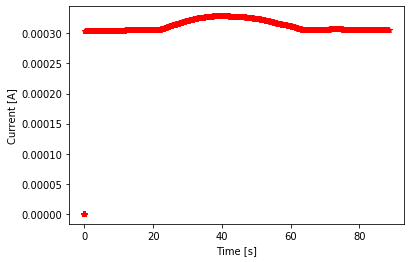

In [22]:
plt.figure()
plt.plot(meas_time,current, 'r*')
plt.ylabel('Current [A]')
plt.xlabel('Time [s]')
plt.show()